# (Static) Community Discovery

We perform a static community discovery task on the graph. Details are expressed in comments at the start of the main code blocks

In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install 'cdlib[all]'
!pip install ndlib
clear_output()

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from collections import Counter
import math

import cdlib
from cdlib import algorithms, evaluation, viz, ensemble

In [ ]:
#we define two functions to perform communitiy algorithm quantitative analysis

def method_insight(method):

  return {'method_params' : method.method_parameters,
   'overlap' : method.overlap,
   'newman_girvan_modularity' : method.newman_girvan_modularity(),
   'node_coverage' : method.node_coverage,
   'node_numbers' : method.size(),
   'method_conductance' : method.conductance(),
   'link_modularity' : method.link_modularity(),
   'avg_internal_degree' : method.average_internal_degree(),
   'internal_edge_density' : method.internal_edge_density(),
   'cut_ratio' : method.cut_ratio(),

  }


def communities_insight(method):
    communities = method.communities
    nodes = set(sum(communities, []))
    return {'total_communities' : len(communities),
     'total_nodes' : len(nodes)
     }

In [ ]:
def plot_boxplot(list_communities):
    labels, data = [], []

    for i in range(len(list_communities)):
        labels.append(list_communities[i][0])
        data.append(list_communities[i][1])

    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(data, labels=labels)

    plt.grid(axis='both', alpha=.2)
    plt.title("Size box-plot")


    plt.xlabel("Algorithms")
    plt.ylabel("Size")
    plt.yscale("log")

    plt.show()

In [ ]:
with open("artists_graph_20.pickle", 'rb') as f:
    G = pickle.load(f)

In [ ]:
G.nodes['Taylor Swift']

{'artist_name': 'Taylor Swift',
 'artist_id': '06HL4z0CvFAxyc27GXpf02',
 'artist_first_genre': ['pop', 'genre_not_available'],
 'artist_popularity': 100,
 'artist_n_followers': 80550791,
 'related_found': True,
 'main_genre': 'pop'}

### K-clique

In [ ]:
k_cliques = ensemble.Parameter(name="k", start=2, end=10, step=1)

In [ ]:
k_clique_communities, k_cliques_score = ensemble.random_search(graph=G, method=algorithms.kclique,
                                              parameters=[k_cliques],
                                              quality_score=evaluation.newman_girvan_modularity,
                                              aggregate=max, instances = 3)

In [ ]:
method_insight(k_clique_communities)

{'method_params': {'k': 7},
 'overlap': True,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.25204686640157226, std=None),
 'node_coverage': 0.3759122369226423,
 'node_numbers': FitnessResult(min=7, max=231, score=20.42334739803094, std=21.497573618791222),
 'method_conductance': FitnessResult(min=0.029565217391304348, max=0.864951768488746, score=0.5303052513586044, std=0.21206242679773307),
 'link_modularity': FitnessResult(min=None, max=None, score=0.07028949237171891, std=None),
 'avg_internal_degree': FitnessResult(min=6.0, max=26.77056277056277, score=10.595193843290726, std=4.720409794318761),
 'internal_edge_density': FitnessResult(min=0.10357352705517868, max=1.0, score=0.7674003361285543, std=0.23336856185252017),
 'cut_ratio': FitnessResult(min=9.204353984294124e-06, max=0.0006031795860708119, score=0.00020191438044350727, std=0.00010712011427109266)}

In [ ]:
communities_insight(k_clique_communities)

{'total_communities': 1422, 'total_nodes': 23952}

In [ ]:
with open("k_clique_communities.pickle", 'wb') as f:
    pickle.dump(k_clique_communities, f)

### Label Propagation

In [ ]:
label_commmunities = algorithms.label_propagation(G)

In [ ]:
method_insight(label_commmunities)

{'method_params': {'': ''},
 'overlap': False,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.7558156797251305, std=None),
 'node_coverage': 1.0,
 'node_numbers': FitnessResult(min=1, max=290, score=31.434139121854958, std=33.81584794969462),
 'method_conductance': FitnessResult(min=0.0, max=0.7837837837837838, score=0.34857820190723904, std=0.16567643360591322),
 'link_modularity': FitnessResult(min=None, max=None, score=0.10958096089062618, std=None),
 'avg_internal_degree': FitnessResult(min=0.0, max=22.96, score=5.568118978514152, std=4.325163233509668),
 'internal_edge_density': FitnessResult(min=0, max=1.0, score=0.25132118054921265, std=0.1662201036048341),
 'cut_ratio': FitnessResult(min=0.0, max=0.00020405280258676168, score=4.092853820324591e-05, std=2.9187835224421455e-05)}

In [ ]:
communities_insight(label_commmunities)

{'total_communities': 2027, 'total_nodes': 63717}

In [ ]:
with open("label_commmunities.pickle", 'wb') as f:
    pickle.dump(label_commmunities, f)

### Demon

In [ ]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.9, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

In [ ]:
demon_comunities, demon_score = ensemble.random_search(graph=G, method=algorithms.demon,
                                                      parameters=[eps, size],
                                                      quality_score=evaluation.newman_girvan_modularity,
                                                      aggregate=max, instances = 3)

In [ ]:
method_insight(demon_comunities)

{'method_params': {'epsilon': 0.2, 'min_com_size': 4},
 'overlap': True,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.5688737998743906, std=None),
 'node_coverage': 0.7288478741937002,
 'node_numbers': FitnessResult(min=5, max=3642, score=484.32173913043476, std=534.0156901753891),
 'method_conductance': FitnessResult(min=0.018867924528301886, max=0.6744186046511628, score=0.24704952782766998, std=0.12454460213687059),
 'link_modularity': FitnessResult(min=None, max=None, score=0.1767597345518356, std=None),
 'avg_internal_degree': FitnessResult(min=2.8, max=21.67989756722151, score=13.177064348693776, std=3.72571524676621),
 'internal_edge_density': FitnessResult(min=0.004005272190642269, max=0.7435897435897436, score=0.09036874038985837, std=0.11179364789146028),
 'cut_ratio': FitnessResult(min=3.211069333409047e-06, max=0.0001788529834940245, score=6.675121683067516e-05, std=3.268933226691569e-05)}

In [ ]:
communities_insight(demon_comunities)

{'total_communities': 460, 'total_nodes': 46440}

In [ ]:
with open("demon_comunities.pickle", 'wb') as f:
    pickle.dump(demon_comunities, f)

### Louvain

In [ ]:
resolution_lp = ensemble.Parameter(name="resolution", start=0.1, end=0.9, step=0.1)
randomize_lp = ensemble.BoolParameter(name="randomize")

louvain_communities, louvain_score = ensemble.random_search(graph=G, method=algorithms.louvain,
                                              parameters=[resolution_lp, randomize_lp],
                                              quality_score=evaluation.newman_girvan_modularity,
                                              instances = 3, aggregate=max)


In [ ]:
method_insight(louvain_communities)

{'method_params': {'weight': 'weight', 'resolution': 0.6, 'randomize': True},
 'overlap': False,
 'newman_girvan_modularity': FitnessResult(min=None, max=None, score=0.9345858905595151, std=None),
 'node_coverage': 1.0,
 'node_numbers': FitnessResult(min=1, max=3553, score=715.9213483146067, std=758.6782004192821),
 'method_conductance': FitnessResult(min=0.0, max=0.13395225464190982, score=0.02436377649977283, std=0.02725293354256284),
 'link_modularity': FitnessResult(min=None, max=None, score=0.13878541569306935, std=None),
 'avg_internal_degree': FitnessResult(min=0.0, max=15.662180974477959, score=8.49180578651426, std=4.920819041071847),
 'internal_edge_density': FitnessResult(min=0, max=1.0, score=0.047767232363505774, std=0.1524261597591469),
 'cut_ratio': FitnessResult(min=0.0, max=2.0499367588428386e-05, score=4.267883479004719e-06, std=4.6388837630152096e-06)}

In [ ]:
communities_insight(louvain_communities)

{'total_communities': 89, 'total_nodes': 63717}

In [ ]:
with open("louvain_communities.pickle", 'wb') as f:
    pickle.dump(louvain_communities, f)

In [ ]:
with open("k_clique_communities.pickle", 'rb') as f:
    k_clique_communities = pickle.load(f)

with open("louvain_communities.pickle", 'rb') as f:
    louvain_communities = pickle.load(f)

with open("demon_comunities.pickle", 'rb') as f:
    demon_comunities = pickle.load(f)

with open("label_commmunities.pickle", 'rb') as f:
    label_commmunities = pickle.load(f)

In [ ]:
communities = {'K-clique' : k_clique_communities, 'Louvain' :louvain_communities,
               'Demon' : demon_comunities, 'Label Propagation' : label_commmunities}

### External evaluation

In [ ]:
louvain_communities.normalized_mutual_information(label_commmunities)

MatchingResult(score=0.6941005239736503, std=None)

In [ ]:
final_results = {}
for name, community in communities.items():
  results = {}
  for name_, community_ in communities.items():
    if name == name_:
      continue
    results[name + ' WITH ' + name_] = community.nf1(community_)
  final_results[name] = results

In [ ]:
final_results

{'K-clique': {'K-clique WITH Louvain': MatchingResult(score=0.0013876237589402957, std=None),
  'K-clique WITH Demon': MatchingResult(score=0.012332578086596822, std=None),
  'K-clique WITH Label Propagation': MatchingResult(score=0.07791179077730725, std=None)},
 'Louvain': {'Louvain WITH K-clique': MatchingResult(score=0.008821409946427723, std=None),
  'Louvain WITH Demon': MatchingResult(score=0.06736754233264758, std=None),
  'Louvain WITH Label Propagation': MatchingResult(score=0.023008486555101636, std=None)},
 'Demon': {'Demon WITH K-clique': MatchingResult(score=0.007474966501130218, std=None),
  'Demon WITH Louvain': MatchingResult(score=0.009006428920371274, std=None),
  'Demon WITH Label Propagation': MatchingResult(score=0.019023582817731376, std=None)},
 'Label Propagation': {'Label Propagation WITH K-clique': MatchingResult(score=0.10181541522983102, std=None),
  'Label Propagation WITH Louvain': MatchingResult(score=0.0030167832875510007, std=None),
  'Label Propagatio

In [ ]:
list_communities = [(name, community.size(summary = False)) for name, community in communities.items()]

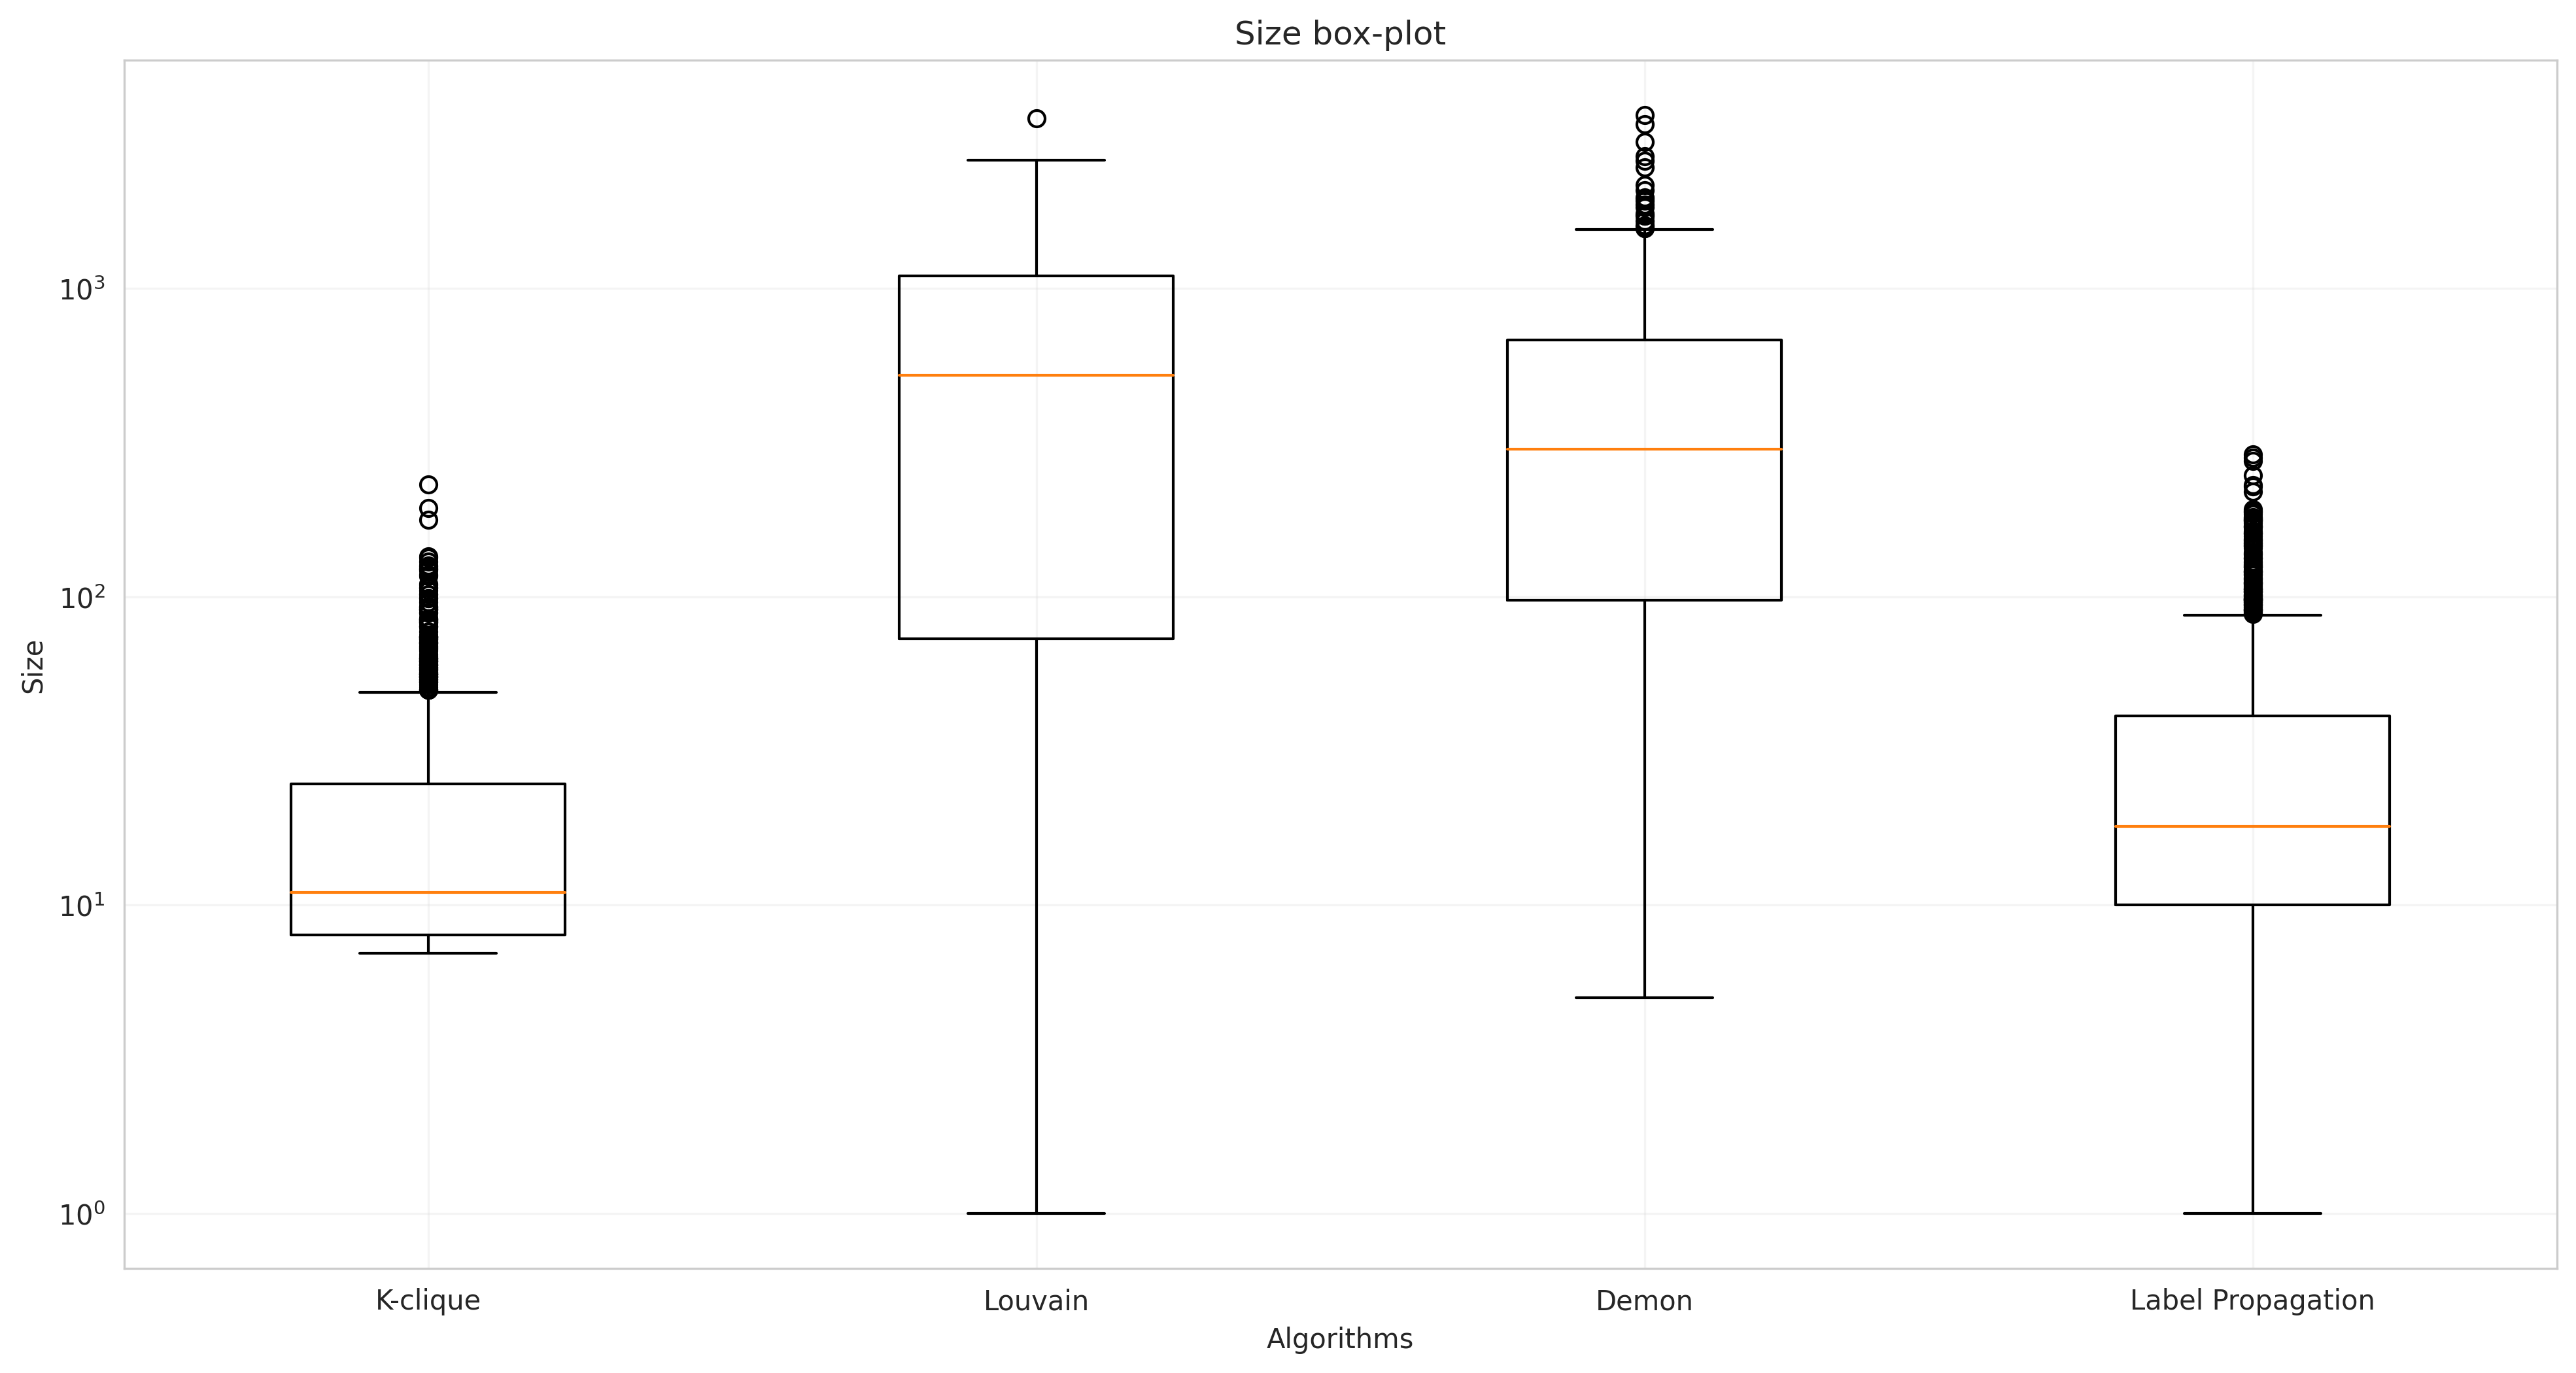

In [ ]:
plot_boxplot(list_communities)

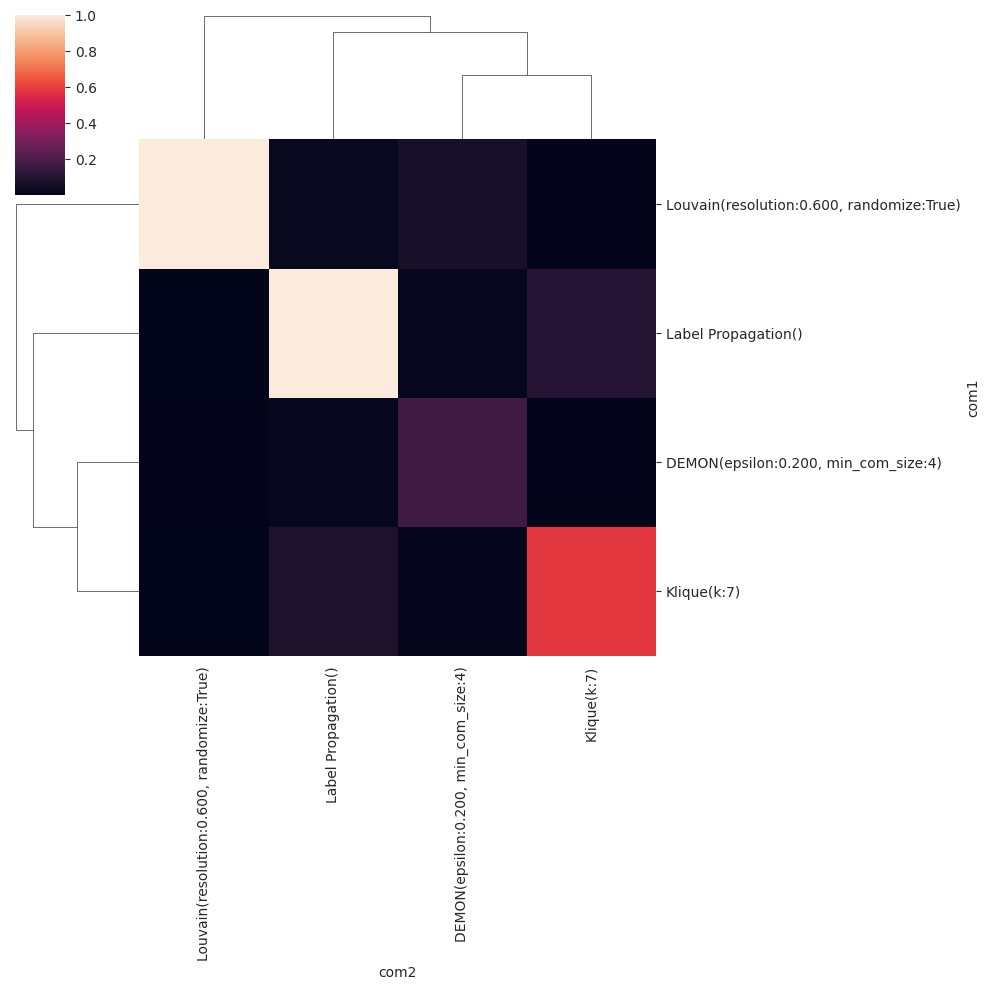

In [ ]:
viz.plot_sim_matrix([k_clique_communities, louvain_communities, label_commmunities, demon_comunities],evaluation.nf1)

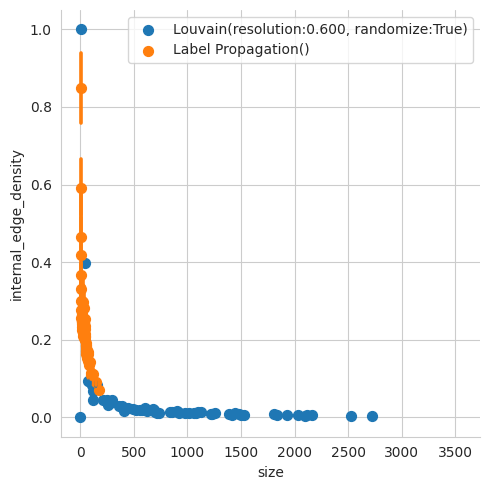

In [ ]:
viz.plot_com_properties_relation([louvain_communities, label_commmunities], evaluation.size, evaluation.internal_edge_density)

<Axes: xlabel='Algorithm', ylabel='average_internal_degree'>

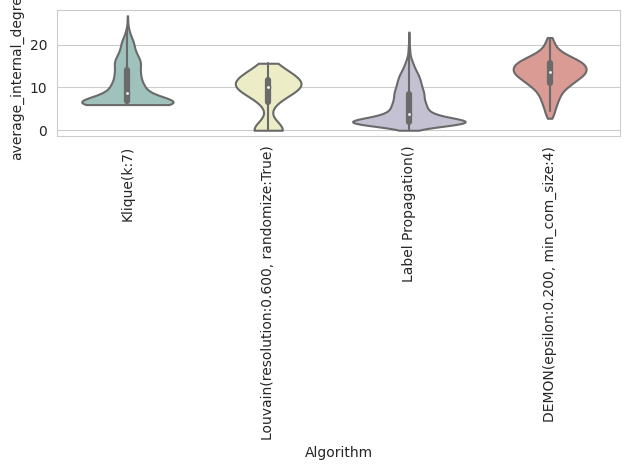

In [ ]:
viz.plot_com_stat([k_clique_communities, louvain_communities, label_commmunities, demon_comunities],evaluation.average_internal_degree)

<Axes: xlabel='Algorithm', ylabel='internal_edge_density'>

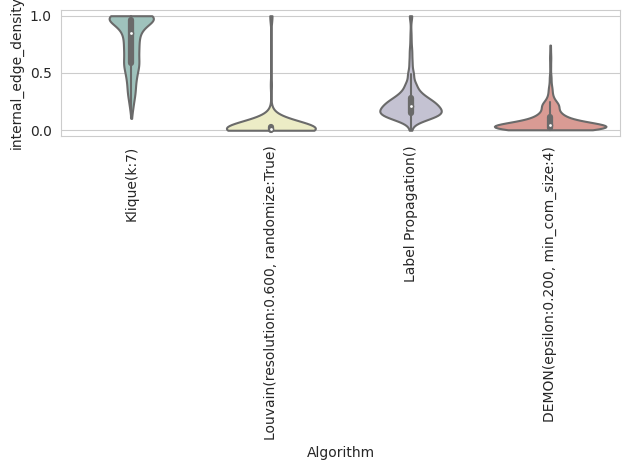

In [ ]:
viz.plot_com_stat([k_clique_communities, louvain_communities, label_commmunities, demon_comunities],evaluation.internal_edge_density)

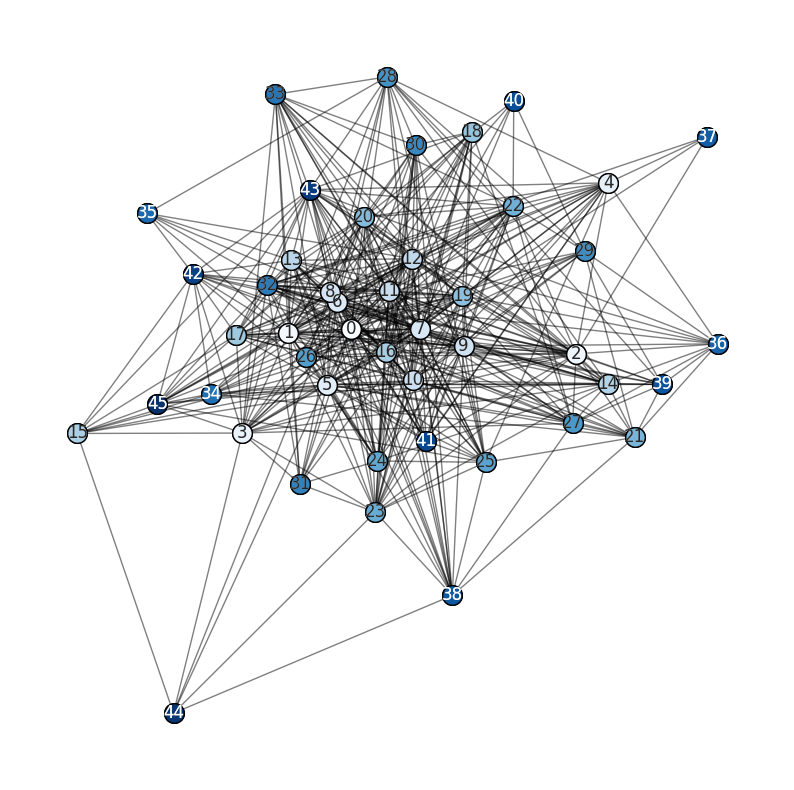

In [ ]:
viz.plot_community_graph(G, louvain_communities, figsize=(10, 10), min_size = 500, cmap = 'Blues', plot_labels = True)

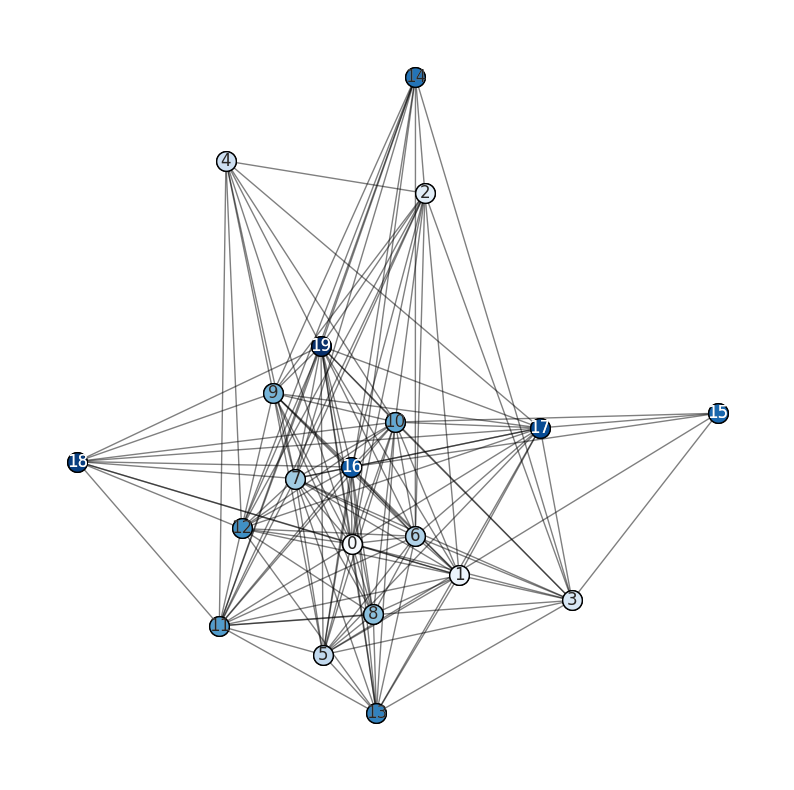

In [ ]:
viz.plot_community_graph(G, louvain_communities, figsize=(10, 10), cmap = 'Blues', plot_labels = True, min_size = 500, top_k = 20)

### Attributes analaysis

In [ ]:
len(G)

63717

In [ ]:
#the function performs a purity analysis for a community method considering an attribute
#we consider as reference the majority attribute of the community vs the rest.

def community_purity(G, method, attr):
  purities = []
  num_nodes = len(set(sum(method.communities, [])))
  for c in method.communities:
    attr_list = []
    for node in c:
      attr_list.append(G.nodes[node][attr])

    cnt = Counter(attr_list)
    purity = max(cnt.values())/sum(cnt.values())
    purity_score = purity * (len(c)/num_nodes)
    purities.append((purity, len(c)))

  return purities


In [ ]:
louvain_purities = community_purity(G, louvain_communities,'main_genre')
louvain_purities = [x[0] for x in louvain_purities if x[1] > 3]

In [ ]:
np.mean(louvain_purities), np.std(louvain_purities)

(0.2456436593770054, 0.11560323607702673)

In [ ]:
genres_lists = [G.nodes[node]['artist_first_genre'] for node in G.nodes()]

In [ ]:
genres = set(sum([G.nodes[node]['artist_first_genre'] for node in list(G.nodes())],[]))

In [ ]:
len(genres)

4728

In [ ]:
def main_genre_community(community, genres = genres):
  genres_lists = [G.nodes[node]['artist_first_genre'] for node in community]
  genres_lists = [x[:-1] if len(x) > 1 else x for x in genres_lists]

  genres_dist = {genre : 0 for genre in genres}
  countings = [(genre,len([0 for genre_list in genres_lists if genre in genre_list])) for genre in genres]
  countings = [(tup[0], tup[1] * 100 / len(genres_lists)) for tup in countings]

  return sorted(countings, key=lambda x: x[1], reverse = True)

In [ ]:
main_genre_community(louvain_communities.communities[10])

In [ ]:
len([com for com in louvain_communities.communities if len(com) <= 2])

20

In [ ]:
#for each community we see the top 5 genres w.r.t. the genre lists
genre_com_dict = { i : (main_genre_community(community)[:5],len(community)) for i, community in enumerate(louvain_communities.communities) if len(community) > 2}

In [ ]:
#for each community, we count how many times in percentage a genre is included
#in the artist genre list related to each artists of a such communtiy

genre_com_dict

{0: ([('genre_not_available', 10.864058542077117),
   ('pop', 4.925415142133408),
   ('r&b', 4.84097945398255),
   ('alternative r&b', 4.587672389529975),
   ('hip hop', 3.8558964255558683)],
  3553),
 1: ([('genre_not_available', 22.106881968473665),
   ('otacore', 7.22798923490965),
   ('pixel', 6.266820453671665),
   ('video game music', 3.537101114955786),
   ('pov: indie', 3.421760861207228)],
  2601),
 2: ([('genre_not_available', 24.208416833667336),
   ('mexican hip hop', 6.412825651302605),
   ('urbano espanol', 4.649298597194389),
   ('spanish hip hop', 4.04809619238477),
   ('mexican rock', 3.3667334669338675)],
  2495),
 3: ([('genre_not_available', 18.19438046982957),
   ('j-pop', 8.337171810225703),
   ('j-rock', 8.198986642100415),
   ('anime', 6.955320128972824),
   ('j-rap', 5.020727775218793)],
  2171),
 4: ([('genre_not_available', 22.784222737819025),
   ('punjabi pop', 11.879350348027842),
   ('filmi', 11.368909512761022),
   ('modern bollywood', 9.883990719257541)